In [ ]:
#드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

# 네이버 언론사별 랭킹뉴스 크롤링 및 데이터 시각화

## 1.패키지 설치 및 임포트

In [2]:
!pip install koreanize-matplotlib
!pip install konlpy

In [3]:
#크롤링
from urllib.request import urlopen
from bs4 import BeautifulSoup

#시간
import pandas as pd
import datetime
from pytz import timezone

#워닝
import warnings
warnings.filterwarnings('ignore')

## 2.네이버 언론사별 랭킹 뉴스 -많이 본 뉴스 크롤링

In [5]:
# 1)데이터 프레임 준비하기
df=pd.DataFrame(columns=['언론사명','순위','기사제목','기사링크','수집일자'])

# 2) 언론사별 랭킹뉴스 url(접속주소)
url ='https://news.naver.com/main/ranking/popularDay.naver?mid=etc&sid1=111'

#3) url 접속하여 html 가져오기
html=urlopen(url) #html태그를 가져옴


# 4) html 태그 파싱하여 변환
soup = BeautifulSoup(html, 'html.parser')  #응답객체를 줘라


# 5)랭킹뉴스 정보가 들어있는 특정 부분 div만 추출 -→ rankingnews_box
div=soup.find_all('div',{'class':'rankingnews_box'})

# 6) 랭킹 뉴스 언론사,기사제목,상세 링크 추출 → rankingnews_name
for index_div in range(len(div)):

  #언론사 추출
  strong=div[index_div].find('strong',{'class':'rankingnews_name'})
  press=strong.text

  # top5 기사 정보 추출 → rankingnews_list
  ul=div[index_div].find_all('ul',{'class','rankingnews_list'})
  for index_r in range(len(ul)):
    li=ul[index_r].find_all('li')

    for index_l in range(len(li)):
      #예외 처리
      try:

        #순위 추출
        rank = li[index_l].find('em',{'class':'list_ranking_num'}).text

        #제목 추출 →list_title nclicks('RBP.rnknws')
        title = li[index_l].find('a',{'class':'list_title'}).text

        #상세 링크 추출 → list_title ,href 속성 정보 추출 attrs메소드
        link = li[index_l].find('a',{'class':'list_title'}).attrs['href']  #대괄호 > 속성이 여러개 있을 수 있음

        temp_df=pd.DataFrame({'언로사명':press,
                             '순위':rank,
                             '기사제목':title,
                             '기사링크':link,
                             '수집일자':datetime.datetime.now(timezone('Asia/Seoul'))},
                            index=['순위'])
        df=pd.concat([df,temp_df],ignore_index=True)


      except:
        pass
      print(rank,'-',title)
    print('='*60)
print('-'*80)
print(df.info())



1 - 대한민국 직장인 절반이 꼽은 “내가 해외여행 두려워하는 이유는…”
2 - 콜드플레이 ‘불륜 스캔들’ 회사 놀라운 근황…‘크리스 마틴 전처’까지 등판
3 - 당첨금 21억2천만원씩, 로또 1등 13명…‘1, 13, 21, 25, 28, 31’
4 - “연루자 100명 다 불었다”…‘미성년자 성착취’ 엡스타인 연인, 폭로
5 - 자동차 경주서 이탈 차량 관중 돌진, 2명 사망…프랑스 ‘발칵’
1 - [단독] '연봉 1억' 이젠 상위 5%에도 못낀다…10년새 3배↑
2 - 룸살롱 사장 열받아 의뢰했다…여성 2명 태운 ‘카니발’ 정체
3 - 서울 명동서 싱크홀…롯데백화점 근처 너비 50㎝ 땅꺼짐
4 - 3만원에 비계 삼겹살 두 덩이…울릉도 그 식당, 7일 영업정지
5 - "온몸에 오물 구더기 우글, 눈도 못 떠"…개 300마리 끔찍한 모습
1 - 홍준표 "신천지 10만 명 국힘 입당…교주가 尹 돕는다더라"
2 - 서울 명동 너비 50cm 땅꺼짐…롯데백화점 주변 교통통제
3 - 태국-캄보디아 계엄령 이후 전선 확대…사망 33명(종합)
4 - 서울 현충원 39도 '극한 폭염'…대관령은 역대 최고기온
5 - 정청래 "협치 불가"…박찬대 "김건희 특검 기한연장 발의"
1 - “한때 줄서서 우르르 샀는데” 하루 1개도 안 팔려…이게 무슨 일
2 - “제발 수건은 한번 쓰고 바로 세탁기에 넣으세요” 드글드글 충격
3 - “1000만 갈 줄 알았더니” 적자 위기 ‘날벼락’…이러다 ‘다 죽어’ 곡소리
4 - “매일 아침 5천원에 김밥 네줄만 싸주실 분” 당근 구인글 ‘뭇매’
5 - 미대 실기대회서 “비행기 추락 직전 기장 표정 묘사하라” …학생들 ‘경악’
1 - 박지원 "김문수가 당대표 될 것 같아…그러면 국힘은 역사 속으로 소멸될 것"
2 - 김건희 자택서 '샤넬 신발' 12켤레 발견, 특검, 치수 일일이 사진 찍어가
3 - 수술 앞둔 검찰, '케비넷 대청소'가 먼저 필요하다[기자의 눈]
4 - 권성동 "홍준표 만성질환 재발, 허위사실 계속 유포하면 법적 대응 나설 것"


## 3.크롤링한 데이터 저장학기

In [ ]:
df.to_csv('네이버 뉴스_많이 보는 뉴스.csv',encoding='utf-8-sig',index=False)

## 4.크롤링한 데이터 시각화

In [6]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import konlpy
from wordcloud import WordCloud


### 워드클라우드 전처리

In [ ]:
#기사 제목 텍스트뭉치
text = ' '.join(title for title in df['기사제목'].astype(str))
text

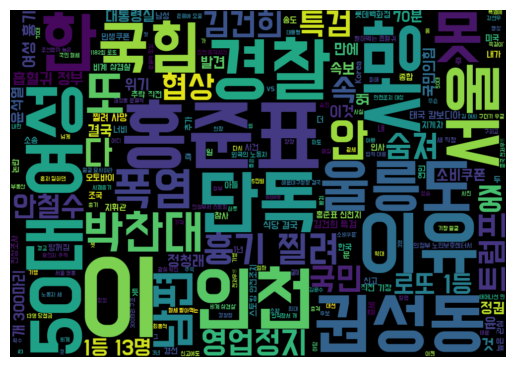

In [8]:
font_path ='/content/BMDOHYEON_ttf.ttf'


wc=WordCloud(width=1000,height=700,font_path=font_path).generate(text)
plt.axis('off')
plt.imshow(wc,interpolation='bilinear')
plt.show()

### 단어 분석


In [10]:
komoran=konlpy.tag.Komoran()
words=komoran.nouns(text)
words[:10]

['대한민국', '직장인', '절반', '해외여행', '이유', '콜드플레이', '불륜', '스캔들', '회사', '근황']

In [23]:
#불용어 리스트 만들어 삭제하기
stopwords=['속보','단독','위','명','것','왜','일','월','만원','원']

def remove_stopwords(words):
  return [word for word in words if word not in stopwords]

In [24]:
words =remove_stopwords(words)
words[:10]

['대한민국', '직장인', '절반', '해외여행', '이유', '콜드플레이', '불륜', '스캔들', '회사', '근황']

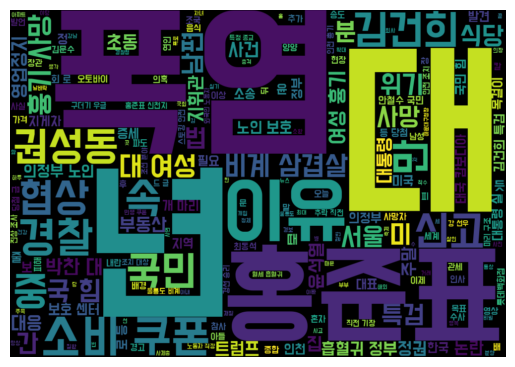

In [25]:
text2 = ' '.join(title for title in words)

wc=WordCloud(width=1000,height=700,font_path=font_path).generate(text2)
plt.axis('off')
plt.imshow(wc,interpolation='bilinear')
plt.show()